In [37]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
train_dir = "C:/Users/SOHAM/python/kaggle_WCD/data/train"
test_dir = "C:/Users/SOHAM/python/kaggle_WCD/data/test"
val_dir = "C:/Users/SOHAM/python/kaggle_WCD/data/valid"

In [46]:
height = 256
width = 256
batch_size = 64

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,labels='inferred',label_mode='int',image_size=(height, width),batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 13104 files belonging to 15 classes.
['Aphid', 'Black Rust', 'Blast', 'Brown Rust', 'Common Root Rot', 'Fusarium Head Blight', 'Healthy', 'Leaf Blight', 'Mildew', 'Mite', 'Septoria', 'Smut', 'Stem fly', 'Tan spot', 'Yellow Rust']


In [48]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,labels='inferred',label_mode='int',image_size=(height, width),batch_size=batch_size)

print(len(test_ds.class_names))

Found 750 files belonging to 15 classes.
15


In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,labels='inferred',label_mode='int',image_size=(height, width),batch_size=batch_size)
print(len(val_ds.class_names))

Found 300 files belonging to 15 classes.
15


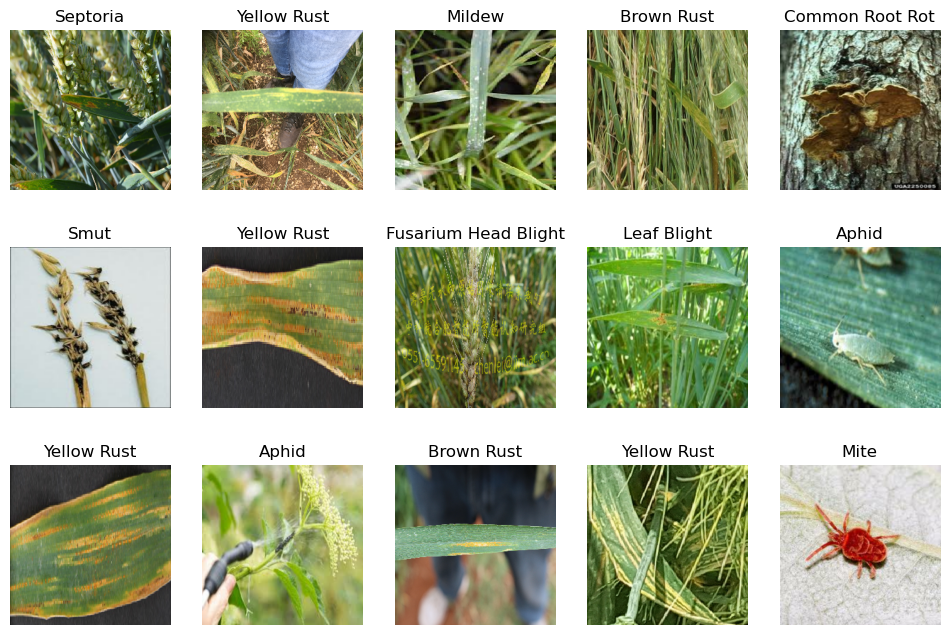

In [50]:

plt.figure(figsize=(12, 8))
for images, labels in train_ds.take(1):
    for i in range(15):          
        ax = plt.subplot(3, 5, i + 1)    
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [51]:

for x,y in val_ds:
    print(x,x.shape)
    print(y,y.shape)
   

tf.Tensor(
[[[[1.22000000e+02 1.28000000e+02 1.00000000e+02]
   [1.10953125e+02 1.16953125e+02 8.89531250e+01]
   [1.26156250e+02 1.30859375e+02 1.03507812e+02]
   ...
   [1.68054688e+02 1.83054688e+02 1.76757812e+02]
   [1.72742188e+02 1.87742188e+02 1.82742188e+02]
   [1.83000000e+02 1.98000000e+02 1.93000000e+02]]

  [[1.16066406e+02 1.22066406e+02 9.40664062e+01]
   [9.43178711e+01 1.00317871e+02 7.23178711e+01]
   [1.07209808e+02 1.11912933e+02 8.45613708e+01]
   ...
   [1.67942108e+02 1.83491760e+02 1.74949921e+02]
   [1.78675781e+02 1.93675781e+02 1.86980469e+02]
   [1.88933594e+02 2.03933594e+02 1.97238281e+02]]

  [[1.02316406e+02 1.09062500e+02 7.88242188e+01]
   [9.68946838e+01 1.03640778e+02 7.34024963e+01]
   [1.19087952e+02 1.24537170e+02 9.49473267e+01]
   ...
   [1.69233368e+02 1.84176514e+02 1.72730621e+02]
   [1.83472656e+02 1.99218750e+02 1.89234375e+02]
   [1.93730469e+02 2.09476562e+02 1.99492188e+02]]

  ...

  [[1.85031250e+02 1.93031250e+02 1.52031250e+02]
   [1

In [52]:


img_size = (256, 256)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

preprocess = keras.Sequential([layers.Rescaling(1./255)])


In [53]:
class_names

['Aphid',
 'Black Rust',
 'Blast',
 'Brown Rust',
 'Common Root Rot',
 'Fusarium Head Blight',
 'Healthy',
 'Leaf Blight',
 'Mildew',
 'Mite',
 'Septoria',
 'Smut',
 'Stem fly',
 'Tan spot',
 'Yellow Rust']

In [54]:
num_classes = len(class_names)

model = keras.Sequential([
    layers.Input(shape=img_size + (3,)),
    data_augmentation,        
    preprocess,              

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])



In [55]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [57]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)


Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.4222 - loss: 1.8565 - val_accuracy: 0.2767 - val_loss: 2.6924
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 755s 4s/step - accuracy: 0.4990 - loss: 1.5853 - val_accuracy: 0.2867 - val_loss: 2.6808
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 780s 4s/step - accuracy: 0.5449 - loss: 1.4397 - val_accuracy: 0.3733 - val_loss: 2.5364
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 792s 4s/step - accuracy: 0.5730 - loss: 1.3347 - val_accuracy: 0.3900 - val_loss: 2.5244
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 777s 4s/step - accuracy: 0.6015 - loss: 1.2539 - val_accuracy: 0.3900 - val_loss: 2.6350


In [58]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),  # Lower from 1e-3
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Add early stopping + ReduceLROnPlateau
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 794s 4s/step - accuracy: 0.6489 - loss: 1.0902 - val_accuracy: 0.4100 - val_loss: 2.3087 - learning_rate: 3.0000e-04
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 807s 4s/step - accuracy: 0.6636 - loss: 1.0277 - val_accuracy: 0.4500 - val_loss: 2.2592 - learning_rate: 3.0000e-04
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - accuracy: 0.6774 - loss: 0.9836 - val_accuracy: 0.4500 - val_loss: 2.3533 - learning_rate: 3.0000e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 797s 4s/step - accuracy: 0.6832 - loss: 0.9630 - val_accuracy: 0.4333 - val_loss: 2.3061 - learning_rate: 3.0000e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.6941 - loss: 0.9343 - val_accuracy: 0.4733 - val_loss: 2.3148 - learning_rate: 3.0000e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 793s 4s/step - accuracy: 0.7162 - loss: 0.8686 - val_accuracy: 0.4633 - val_loss: 2.4884 - learning_rate: 1.5000e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 778s 4s/step - acc